In [1]:
import numpy as np
import matplotlib.pyplot as pit
import pandas as pd

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [18]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[64  4]
 [ 3 29]]


0.93

C:\Users\venki\AppData\Local\Temp\ipykernel_15084\3613307927.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pit.scatter(x_set[y_set==j,0],x_set[y_set==j,1],


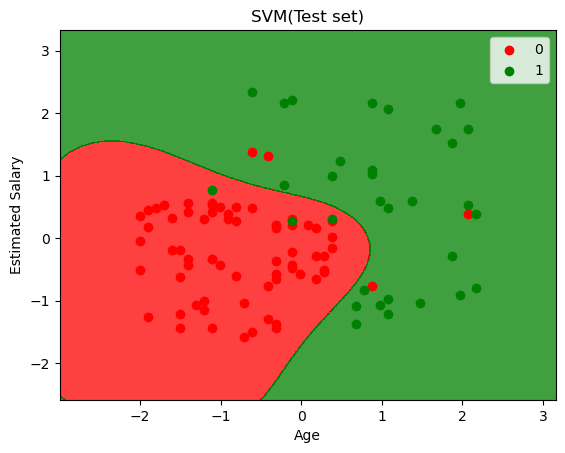

In [34]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),np.arange(start=x_set[:,1].min()-1,stop=
x_set[:,1].max()+1,step=0.01))
pit.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),
x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
pit.xlim(x1.min(),x1.max())
pit.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    pit.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
pit.title('SVM(Test set)')
pit.xlabel('Age')
pit.ylabel('Estimated Salary')
pit.legend()
pit.show()

